# Flerdimensjonale funksjoner
### Oppgave 1
*Lag en funksjon i Python som bestemmer funksjonsverdier til funksjoner av formen f(x, y). For eksempel, test funksjonen din med f(x, y) = xy + x^2 for forskjellige verdier av x og y.*

In [1]:
def f(x,y):
    return x*y+x**2 #vi lager en funksjon som returnerer en verdi med parametrene x og y

#tester for noen utvalgte verdier 
print(f(3,2))
print(f(392,174))

15
221872


### Oppgave 2
*Lag en funksjon i Python som visualiserer funksjoner av formen f(x, y). For eksempel, test funksjonen din med f(x, y) = xy + x^2. Hvordan forventer du at visualiseringen skal se ut?*

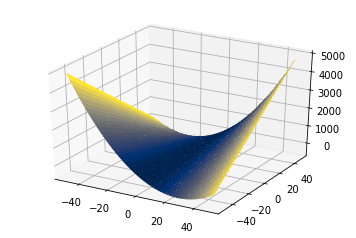

In [11]:
import numpy as np #vi importerer tre biblioteker for å lage et meshgrid, og for å visualisere meshgriden vår
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d

xVerdier = [] #lager tomme lister hvor vi kan oppbevare de forskjellige verdisettene vi regner ut
yVerdier = []
zVerdier = []

for x in range(-50,50): #beregner z for heltall mellom -50 og 50 ved å bruke to for-løkker
    for y in range(-50,50):#vi velger nokså små områder siden det kan ta lang tid å regne ut
        xVerdier.append(x)
        yVerdier.append(y)
        zVerdier.append(f(x,y))

X,Y = np.meshgrid(xVerdier,yVerdier) #omgjør listene våre til et meshgrid
Z = f(X,Y)
fig = plt.figure() #lager en figur
ax = fig.add_subplot(111, projection = "3d") #deklarerer den som 3d

ax.plot_surface(X, Y, Z, cmap="cividis") #plotter x, y og z-verdiene våre med f.eks. plot_surface. Kan også bruke blant annet plot_wireframe.  

#### Kommentar
Vi observerer en graf som ser ut som en andregradsfunksjon hvis snitter den langs x-aksen, og en lineær funksjon hvis vi snitter den langs y-aksen

### Oppgave 4
*For en funksjon som f(x, y) har man to variable man kan derivere med hensyn på - nemlig, x og y. Hvis man deriverer f(x, y) med hensyn på x skriver man ∂f/∂x og kaller dette den partiell deriverte til f med hensyn på x. For eksempel, for f(x, y) = xy + x^2 er ∂f/∂x = y + 2x og ∂f/∂y = x. Ideen er at man samler dette som vektoren∇f =[∂f/∂x,∂f/∂y] og kaller dette gradienten til f. Lag en funksjon som regner ut de partiell deriverte til en funksjon, og lag en funksjon som regner ut gradienten til en funksjon.*

In [3]:
u = 0.0001 #definerer en veldig liten u for å tilnærme den deriverte. Jo mindre u, jo mer nøyaktig

def PartiellDeriverteX(x, y): #returnerer den partiellderiverte til en funksjon med hensyn på x
    return (f(x + u, y) - f(x, y))/u

def PartiellDeriverteY(x, y): #freturnerer den partiellderiverte til en funksjon med hensyn på y
    return (f(x, y + u) - f(x, y))/u

def Gradient(x, y): #returnerer gradienten til funksjonen
    return PartiellDeriverteX(x, y), PartiellDeriverteY(x, y)

### Oppgave 3
*Hva betyr det at en funksjon av formen f(x, y) har et nullpunkt? Hvordan skal man finne nullpunktet til en slik funksjon? Lag en funksjon i Python som finner et
lokalt nullpunkt, altså et nullpunkt innen et avgrenset område?*

En slik funksjon har et nullpunkt dersom f(x, y) = 0. Å finne dette nullpunktet kan gjøres greit numerisk. Vi velger å bruke Newton’s metode til å oppnå dette. Grunntanken i Newton’s metode er at man i hver iterasjon lager en veldig røff, lineær modell av funksjonen, og bruker denne til å komme nærmere nullpunktet til den faktiske funksjonen. Denne grunntanken kan også anvendes i funksjoner med 2 variable.

In [4]:
e = 0.00001 #tillat feilmargin

def NewtonsMetode(x_0, y_0, n): #x_0 og y_0 beskriver punktet vi befinner oss på i denne iterasjonen. n er et tall på antall ganger vi har iterert.
    if(n > 1000): #dersom funksjonen iterer over 1000 ganger uten å finne noe nullpunkt, antar vi at metoden divergerer og vi aldri får noe svar
        print("Konvergerer ikke")
        return 0, 0
    if(abs(f(x_0, y_0)) < e): #dersom f(x_0, y_0) er tilnærmet 0 innenfor feilmarginen, avslutter vi søket og returnerer svaret vårt
        return x_0, y_0
    else: #hvis vi fortsatt er for langt unna, lager vi en ny lineær modell av funksjonen, og finner når denne linjen  treffer XY-planet. Modellen vår er annenhver gang avhengig av den deriverte med hensyn på x og y, slik at vi nærmer oss nullpunktet langs begge aksene.
        if(n%2 == 0):
            x_1 = x_0 - f(x_0,y_0)/PartiellDeriverteX(x_0, y_0)
            return NewtonsMetode(x_1, y_0, n+1)
        else:
            y_1 = y_0 - f(x_0,y_0)/PartiellDeriverteY(x_0, y_0)
            return NewtonsMetode(x_0, y_1, n+1)

print(NewtonsMetode(0, 0, 0))
print(NewtonsMetode(1, 1, 0))
print(NewtonsMetode(5, 2, 0))

(0, 0)
(0.33335555481512447, -0.3333555548149285)
(2.0833576386815578, -2.083357638666648)


#### Kommentar
Vi observerer at vi får forskjellige nullpunkter etter hva vi setter som utgangspunkt. Dette er fordi grafen har flere nullpunkter, mens vår metode kun returnerer det den finner raskest, som varierer ut ifra hvor vi starter

### Oppgave 5
*Hvordan vil differensiallikninger med funksjoner av to variable se ut? Klarer du å lage noen eksempler? Hvordan kunne man løst en slik differensiallikning numerisk?*

Varmelikningen er et eksempel på en differensiallikning som kan ha to variable. Hvis vi setter av én variabel til tid og én variabel til rom, ser differensiallikning slik ut:
∂f/∂t = α*∂^2f/∂x^2
hvor t er tiden, x er en dimensjon i rommet og α er en proporsjonalitetskonstant

Å løse slike Partielle differensialligninger (PDEer) er svært komplisert. Allikevel finnes metoder som elementmetoden (FEM), som løser PDEer numerisk. Det finnes også Python-biblioteker (eks: SfePy) som løser PDEer for oss, men selv bare å anvende disse er et stykke over vårt nivå.

Vi har derimot funnet ut at likningsett med to differensiallikninger og to variable enkelt kan løses slik:

Vi tar utgangspunkt i funksjonen x*y + x**2, som vi startet med. Deriverer vi funksjonen analytisk med hensyn på x og y henholdsvis, får vi et likningsett med to differensiallikninger, som vi enkelt kan løse. Vi må også definere en initialbetingelse for å få et utgangspunkt.


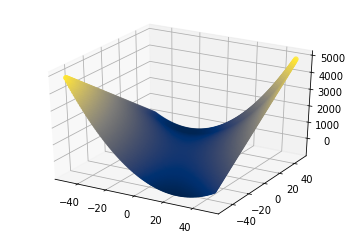

In [5]:
def difflikningX(x,y): #∂f/∂x
    return y + 2*x

def difflikningY(x,y): #∂f/∂y
    return x

#initialbetingelse: f(-50,-50) = 5000 

def eulers(x_1,y_1,z_1):
    startx = x_1
    gammelz = z_1
    x = []
    y = []
    z = []
    for n in range(100):
        for m in range(100):
            ny_z = z_1 + difflikningX(x_1,y_1)
            x_1 += 1
            x.append(x_1)
            y.append(y_1)
            z.append(ny_z)
            z_1 = ny_z
        y_1 += 1
        x_1 = startx
        z_1 = gammelz + difflikningY(x_1,y_1)
        gammelz = z_1
    return x,y,z

xListe, yListe, zListe = eulers(-50,-50,5000)

ax = plt.axes(projection="3d")
ax.scatter3D(xListe,yListe,zListe,c=zListe,cmap="cividis")

Vi kan se at det vi plottet er helt likt plottet fra oppgave 2, som var det vi brukte som utgangspunkt for difflikningen.

### Oppgave 6
Hvordan kan man finne topp- eller bunnpunktet til flaten til en funksjon på formen f(x, y)? Klarer du å lage en funksjon som gjør dette i Python?

In [6]:
import math

e = 0.0001

def PartiellDobbeltDeriverteX(x, y): #returnerer den partiellderiverte til den partiellderiverte til f med hensyn på x
    return (PartiellDeriverteX(x + u, y) - PartiellDeriverteX(x, y))/u

def PartiellDobbeltDeriverteY(x, y): #returnerer den partiellderiverte til den partiellderiverte til f med hensyn på y
    return (PartiellDeriverteY(x, y + u) - PartiellDeriverteY(x, y))/u


def NewtonsMetodeEkstremalpunkt(x_0, y_0, n): #x_0 og y_0 beskriver punktet vi befinner oss på i denne iterasjonen. n er et tall på antall ganger vi har iterert.
    if(n > 1000): #dersom funksjonen iterer over 1000 ganger uten å finne noe nullpunkt, antar vi at metoden divergerer og vi aldri får noe svar
        print("Konvergerer ikke")
        return 0, 0
    if(abs(PartiellDeriverteX(x_0, y_0)) < e and abs(PartiellDeriverteY(x_0, y_0)) < e): #dersom den partiellderiverte med hensyn på x og y henholdsvis er tilnærmet 0 innenfor feilmarginen, avslutter vi søket og returnerer svaret vårt
        print(PartiellDeriverteX(x_0, y_0), PartiellDeriverteY(x_0, y_0))
        return x_0, y_0
    else: #hvis vi fortsatt er for langt unna, lager vi en ny lineær modell av funksjonen, og finner når denne linjen  treffer XY-planet. Modellen vår er annenhver gang avhengig av den dobbeltderiverte med hensyn på x og y, slik at vi nærmer oss ekstremalpunktet langs begge aksene.
        if(n%2 == 0):
            x_1 = x_0 - PartiellDeriverteX(x_0,y_0)/PartiellDobbeltDeriverteX(x_0, y_0)
            return NewtonsMetodeEkstremalpunkt(x_1, y_0, n+1)
        else:
            y_1 = y_0 - PartiellDeriverteY(x_0,y_0)/PartiellDobbeltDeriverteY(x_0, y_0)
            return NewtonsMetodeEkstremalpunkt(x_0, y_1, n+1)

print(NewtonsMetodeEkstremalpunkt(0, 0, 0)) #starter med å gjette at ekstremalpunktet er på x=0 og y=0

9.999999999999999e-05 0.0
(0, 0)


#### Kommentar
Vår implementasjon av Newtons metode her ser for det meste ut til å fungere, men ved noen tilfeller får vi plutselig og helt uforklarlig float division by zero. Etter mye tid brukt på å undersøke og diskutere, har vi konkludert med at det ikke kan være noe annet enn bakgrunnsstråling fra universet som forårsaker dette

### Oppgave 7
Modelleringsproblem: tilpasses gruppene enkeltvis

*Problem: Funksjonen f(x,y) er en modell for inntektene til et togselskap, som funksjon av antall passasjerer og antall billettkontrollører de har ansatt. Modellen tar utgangspunkt i at lønnsutgifter øker lineært med antall billettkontrollører, og at antall mennesker som sniker og antall mennesker som kjøper billett avhenger av antall kontrollører som er ansatt*

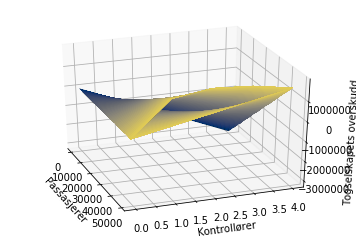

In [7]:
xVerdier = [] #lager tomme lister hvor vi kan oppbevare de forskjellige verdisettene vi regner ut
yVerdier = []
zVerdier = []

lønn = 800000
billett = 80
bot = 1000

def g(x,y):
    botAndel = -0.8 / (y+8) + 0.1 #bruker en rasjonal funksjon som modell for hvor stor andel mennesker som blir tatt av kontrollørene og får bot
    betaleAndel = 1- 1 / (y+1) #bruker også en rasjonal funksjon som modell for hvor stor andel som kjøper billett. Den antar bl.a. at hvis det hadde vært 0 kontrollører, hadde alle sneket

    return -lønn * y + billett * betaleAndel * x + bot * botAndel * x #funksjonen returnerer en verdi med parametrene x og y


for x in range(0,50): #beregner z for 0-50000 passasjerer og 0-5 konduktører
    for y in range(0,5):
        xVerdier.append(x*1000)
        yVerdier.append(y)
        zVerdier.append(g(x*1000,y))

X,Y = np.meshgrid(xVerdier,yVerdier) #omgjør listene våre til et meshgrid
Z = g(X,Y)
fig = plt.figure() #lager en figur
ax = fig.add_subplot(111, projection = "3d") #deklarerer den som 3d


ax.set_xlabel("Passasjerer") #setter navn på aksene
ax.set_ylabel("Kontrollører")
ax.set_zlabel("Togselskapets overskudd")


ax.view_init(30,-20) #roterer figuren for å få bedre oversikt
ax.plot_surface(X, Y, Z, cmap="cividis") #plotter x, y og z-verdiene våre med plot_surface


*-Hvor mye tjener togselskapet hvis de ansetter 2 kontrollører og har 30000 passasjerer?*

Dette er så simpelt som å bare kalle funksjonen med parametrene 30000 og 2. Svaret er 600000kr


In [8]:
print(g(30000,2))

600000.0000000003


*-Når går togselskapet i null?*

Vi kan anvende nullpunkts-algoritmen som vi skrev i sted. Likevel kan vi observere at vi får forskjellige nullpunkter alt ettersom hva vi setter som utgangspunkt. Dette er fordi grafen har flere nullpunkter, mens vår metode kun returnerer det den finner raskest, som varierer ut ifra hvor vi starter


In [9]:
def GPartiellDeriverteX(x, y): #returnerer den partiellderiverte til f med hensyn på x
    return (g(x + u, y) - g(x, y))/u

def GPartiellDeriverteY(x, y): #freturnerer den partiellderiverte til f med hensyn på y
    return (g(x, y + u) - g(x, y))/u

def GNewtonsMetode(x_0, y_0, n):
    if(n > 1000):
        print("Konvergerer ikke")
        return 0, 0
    if(abs(f(x_0, y_0)) < e):
        return x_0, y_0
    else:
        if(n%2 == 0):
            x_1 = x_0 - f(x_0,y_0)/GPartiellDeriverteX(x_0, y_0)
            return NewtonsMetode(x_1, y_0, n+1)
        else:
            y_1 = y_0 - f(x_0,y_0)/GPartiellDeriverteY(x_0, y_0)
            return NewtonsMetode(x_0, y_1, n+1)

print(GNewtonsMetode(0, 0, 0))
print(GNewtonsMetode(1, 1, 0))
print(GNewtonsMetode(2, 2, 0))

(0, 0)
(0.9608695650953862, -0.960869565097757)
(1.8909090914725026, -1.8909090914665838)


*-Når tjener togselskapet mest?*

Vi forsøkte også å anvende ekstremalpunkts-algoritmen vi skrev tidligere til å finne ut hvordan togselskapet kunne optimalisert inntektene sine. Dette fungerte dårlig, ettersom modellen vi har laget ikke har noen punkter hvor veksten i både x- og y-retning er 0, det vil alltid være lønnsomt å ha flere passasjerer. Dette er selvfølgelig urealistisk, men etter vår modell vil togselskapet dermed tjene mest (uendelig mye) hvis de har uendelig mange passasjerer, og mer enn 0 kontrollører.
